In [2]:
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from ipywidgets import interact
from keras.layers import Input, Dense, Dropout,Conv2D,MaxPooling2D,Flatten
from keras.layers import GlobalMaxPooling2D,UpSampling2D,GlobalMaxPooling1D
from keras.models import Model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from skimage.color import rgb2grey

C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
train_x = np.load("train_x.npy")
train_y = np.load("train_y.npy")
train_y = train_y - 1
test_x  = np.load("test.npy")

In [30]:
def makeModel(inputSize):
    inputs = Input(shape=inputSize,name="input")
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = GlobalMaxPooling2D()(x)
    x = Dense(100,activation='relu')(x)
    out = Dense(10,activation='softmax', name="output")(x)

    model = Model(inputs=inputs, outputs=out)
    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])
    
    return model

def learningCurves(hist):
    histLoss_train      = hist.history['loss']
    epochs = len(histLoss_train)
    
    plt.figure(figsize=(12,12))
    
    plt.plot(range(epochs),histLoss_train, label="Training Loss", color="#acc6ef")


    plt.xlabel('Epochs',fontsize=14)
    plt.title("Learning Curves",fontsize=20)

    plt.legend()
    plt.show()

In [28]:
model2 = makeModel((32,32,3,))
model2.summary()
hist2 = model2.fit(train_x, to_categorical(train_y,10),batch_size=100,epochs=500)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
global_max_pooling2d_5 (Glob (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               3300      
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total para

43954/43954 [==============================] - 3s 74us/step - loss: 0.8612 - acc: 0.7209
Epoch 70/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.8583 - acc: 0.7181
Epoch 71/500
43954/43954 [==============================] - 3s 74us/step - loss: 0.8593 - acc: 0.7168
Epoch 72/500
43954/43954 [==============================] - 3s 75us/step - loss: 0.8568 - acc: 0.7196
Epoch 73/500
43954/43954 [==============================] - 3s 75us/step - loss: 0.8575 - acc: 0.7211
Epoch 74/500
43954/43954 [==============================] - 3s 75us/step - loss: 0.8563 - acc: 0.7208
Epoch 75/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.8472 - acc: 0.7221
Epoch 76/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.8407 - acc: 0.7223
Epoch 77/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.8446 - acc: 0.7236
Epoch 78/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.8422 - acc: 

Epoch 149/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.7676 - acc: 0.7462
Epoch 150/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.7745 - acc: 0.7433
Epoch 151/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.7725 - acc: 0.7462
Epoch 152/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.7742 - acc: 0.7429
Epoch 153/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.7697 - acc: 0.7464
Epoch 154/500
43954/43954 [==============================] - 3s 71us/step - loss: 0.7748 - acc: 0.7451
Epoch 155/500
43954/43954 [==============================] - 3s 71us/step - loss: 0.7693 - acc: 0.7440
Epoch 156/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.7650 - acc: 0.7463
Epoch 157/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.7643 - acc: 0.7480
Epoch 158/500
43954/43954 [==============================] - 3s 72us/step

43954/43954 [==============================] - 3s 74us/step - loss: 0.7346 - acc: 0.7554
Epoch 229/500
43954/43954 [==============================] - 3s 71us/step - loss: 0.7313 - acc: 0.7565
Epoch 230/500
43954/43954 [==============================] - 3s 71us/step - loss: 0.7357 - acc: 0.7548
Epoch 231/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.7339 - acc: 0.7563
Epoch 232/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.7385 - acc: 0.7557
Epoch 233/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.7282 - acc: 0.7576
Epoch 234/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.7309 - acc: 0.7575
Epoch 235/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.7325 - acc: 0.7571
Epoch 236/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.7342 - acc: 0.7562
Epoch 237/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.727

43954/43954 [==============================] - 3s 73us/step - loss: 0.7166 - acc: 0.7612
Epoch 308/500
43954/43954 [==============================] - 3s 74us/step - loss: 0.7116 - acc: 0.7631
Epoch 309/500
43954/43954 [==============================] - 3s 74us/step - loss: 0.7187 - acc: 0.7600
Epoch 310/500
43954/43954 [==============================] - 3s 74us/step - loss: 0.7100 - acc: 0.7627
Epoch 311/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.7100 - acc: 0.7655
Epoch 312/500
43954/43954 [==============================] - 3s 74us/step - loss: 0.7136 - acc: 0.7619
Epoch 313/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.7115 - acc: 0.7646
Epoch 314/500
43954/43954 [==============================] - 3s 75us/step - loss: 0.7113 - acc: 0.7638
Epoch 315/500
43954/43954 [==============================] - 3s 74us/step - loss: 0.7130 - acc: 0.7630
Epoch 316/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.704

43954/43954 [==============================] - 3s 73us/step - loss: 0.7011 - acc: 0.7674
Epoch 387/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.7085 - acc: 0.7667
Epoch 388/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.7019 - acc: 0.7648
Epoch 389/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.6932 - acc: 0.7691
Epoch 390/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.7011 - acc: 0.7676
Epoch 391/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.6981 - acc: 0.7685
Epoch 392/500
43954/43954 [==============================] - 4s 80us/step - loss: 0.6984 - acc: 0.7685
Epoch 393/500
43954/43954 [==============================] - 3s 75us/step - loss: 0.6946 - acc: 0.7695
Epoch 394/500
43954/43954 [==============================] - 3s 74us/step - loss: 0.6998 - acc: 0.7679
Epoch 395/500
43954/43954 [==============================] - 3s 74us/step - loss: 0.700

43954/43954 [==============================] - 3s 74us/step - loss: 0.6854 - acc: 0.7727
Epoch 466/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.6870 - acc: 0.7708
Epoch 467/500
43954/43954 [==============================] - 3s 72us/step - loss: 0.6885 - acc: 0.7707
Epoch 468/500
43954/43954 [==============================] - 3s 74us/step - loss: 0.6866 - acc: 0.7718
Epoch 469/500
43954/43954 [==============================] - 3s 74us/step - loss: 0.6983 - acc: 0.7689
Epoch 470/500
43954/43954 [==============================] - 3s 74us/step - loss: 0.6878 - acc: 0.7712
Epoch 471/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.6862 - acc: 0.7727
Epoch 472/500
43954/43954 [==============================] - 3s 75us/step - loss: 0.6839 - acc: 0.7729
Epoch 473/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.6838 - acc: 0.7722
Epoch 474/500
43954/43954 [==============================] - 3s 73us/step - loss: 0.696

KeyboardInterrupt: 

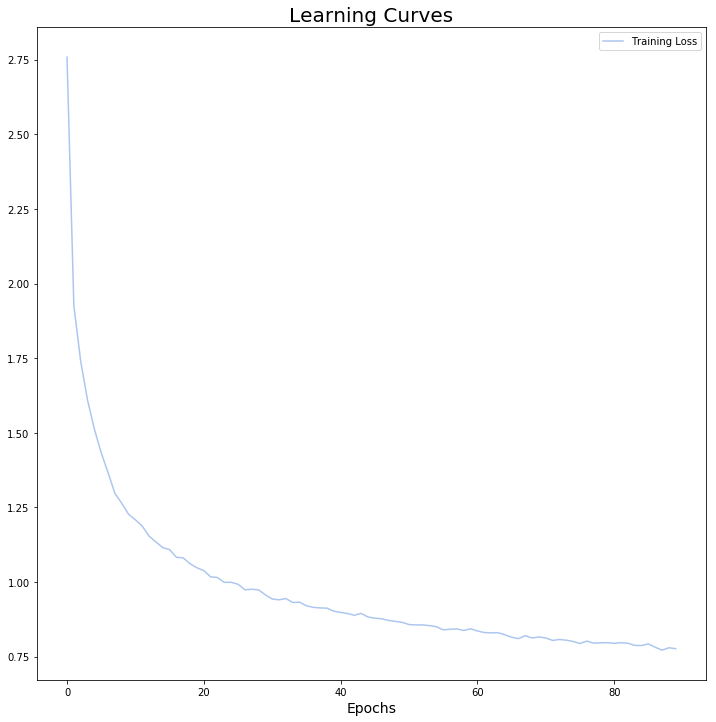

In [31]:
learningCurves(hist2)

In [33]:
pred = model2.predict(test_x)
pred = np.argmax(pred,1)
pred = pred + 1

In [34]:
submission = pd.DataFrame.from_items([
    ('id',list(range(pred.shape[0]))),
    ('label', pred)])

submission.to_csv('well_submission.csv', index = False)

In [24]:
submission.head()

,id,label
0,0,9
1,1,9
2,2,8
3,3,1
4,4,2
